Epoch 1/70
148/148 [==============================] - 1s 968us/step - loss: 0.0105
Epoch 2/70
148/148 [==============================] - 0s 712us/step - loss: 5.4970e-06
Epoch 3/70
148/148 [==============================] - 0s 774us/step - loss: 5.3540e-06
Epoch 4/70
148/148 [==============================] - 0s 723us/step - loss: 5.3439e-06
Epoch 5/70
148/148 [==============================] - 0s 732us/step - loss: 5.4456e-06
Epoch 6/70
148/148 [==============================] - 0s 776us/step - loss: 5.3380e-06
Epoch 7/70
148/148 [==============================] - 0s 736us/step - loss: 5.2341e-06
Epoch 8/70
148/148 [==============================] - 0s 712us/step - loss: 5.2137e-06
Epoch 9/70
148/148 [==============================] - 0s 703us/step - loss: 5.4747e-06
Epoch 10/70
148/148 [==============================] - 0s 775us/step - loss: 5.1313e-06
Epoch 11/70
148/148 [==============================] - 0s 763us/step - loss: 5.2313e-06
Epoch 12/70
148/148 [========================

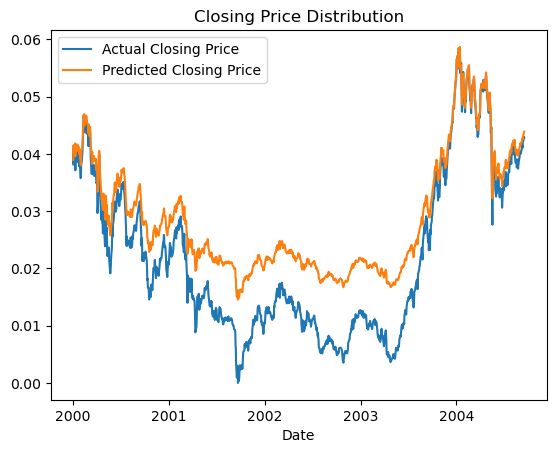



Mean Absolute Error : 0.00666


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

nifty ="Nifty.csv"
data = pd.read_csv(nifty, index_col="Date", parse_dates=True)

# Normalize numerical columns
scaler = MinMaxScaler()
data[['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close']])

# Ensure data is not shuffled while splitting
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

model = tf.keras.Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(loss='mse', optimizer='adam')
model.fit(train_data[['Open', 'High', 'Low', 'Close']], train_data['Close'], epochs=70)
predicted_closing_prices = model.predict(test_data[['Open', 'High', 'Low', 'Close']])

plt.plot(test_data.index, test_data['Close'], label='Actual Closing Price')
plt.plot(test_data.index, predicted_closing_prices, label='Predicted Closing Price')
plt.title("Closing Price Distribution")
plt.xlabel("Date")
plt.legend()
plt.show()

mae = mean_absolute_error(test_data['Close'], predicted_closing_prices)
print(f"\n\nMean Absolute Error : {round(mae, 5)}")